In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')


In [2]:
df=pd.read_csv("Metabolic  Syndrome.csv")

In [3]:
df

,seqn,Age,Sex,Marital,Income,Race,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides,MetabolicSyndrome
0,62161,22,Male,Single,8200.0,White,81.0,23.3,0,3.88,4.9,92,41,84,No MetSyn
1,62164,44,Female,Married,4500.0,White,80.1,23.2,0,8.55,4.5,82,28,56,No MetSyn
2,62169,21,Male,Single,800.0,Asian,69.6,20.1,0,5.07,5.4,107,43,78,No MetSyn
3,62172,43,Female,Single,2000.0,Black,120.4,33.3,0,5.22,5.0,104,73,141,No MetSyn
4,62177,51,Male,Married,NaN,Asian,81.1,20.1,0,8.13,5.0,95,43,126,No MetSyn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2396,71901,48,Female,Married,1000.0,Other,NaN,59.7,0,22.11,5.8,152,57,107,No MetSyn
2397,71904,30,Female,Single,2000.0,Asian,NaN,18.0,0,2.90,7.9,91,90,91,No MetSyn
2398,71909,28,Male,Single,800.0,MexAmerican,100.8,29.4,0,2.78,6.2,99,47,84,No MetSyn
2399,71911,27,Male,Married,8200.0,MexAmerican,106.6,31.3,0,4.15,6.2,100,41,124,MetSyn


In [4]:
df.head()

,seqn,Age,Sex,Marital,Income,Race,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides,MetabolicSyndrome
0,62161,22,Male,Single,8200.0,White,81.0,23.3,0,3.88,4.9,92,41,84,No MetSyn
1,62164,44,Female,Married,4500.0,White,80.1,23.2,0,8.55,4.5,82,28,56,No MetSyn
2,62169,21,Male,Single,800.0,Asian,69.6,20.1,0,5.07,5.4,107,43,78,No MetSyn
3,62172,43,Female,Single,2000.0,Black,120.4,33.3,0,5.22,5.0,104,73,141,No MetSyn
4,62177,51,Male,Married,NaN,Asian,81.1,20.1,0,8.13,5.0,95,43,126,No MetSyn


In [5]:
# for col in df.columns:
#     print(f"{col} = {df[[col]].head()}")

In [6]:
for col in df.columns:
    print(f"null values in {col}={df[col].isna().sum()} && null %age={df[col].isna().sum()/df.shape[0] *100}")

null values in seqn=0 && null %age=0.0
null values in Age=0 && null %age=0.0
null values in Sex=0 && null %age=0.0
null values in Marital=208 && null %age=8.663057059558517
null values in Income=117 && null %age=4.872969596001666
null values in Race=0 && null %age=0.0
null values in WaistCirc=85 && null %age=3.540191586838817
null values in BMI=26 && null %age=1.0828821324448146
null values in Albuminuria=0 && null %age=0.0
null values in UrAlbCr=0 && null %age=0.0
null values in UricAcid=0 && null %age=0.0
null values in BloodGlucose=0 && null %age=0.0
null values in HDL=0 && null %age=0.0
null values in Triglycerides=0 && null %age=0.0
null values in MetabolicSyndrome=0 && null %age=0.0


In [7]:
df.isna().sum()

seqn                   0
Age                    0
Sex                    0
Marital              208
Income               117
Race                   0
WaistCirc             85
BMI                   26
Albuminuria            0
UrAlbCr                0
UricAcid               0
BloodGlucose           0
HDL                    0
Triglycerides          0
MetabolicSyndrome      0
dtype: int64

In [8]:
df.Marital.value_counts()

Married      1192
Single        498
Divorced      242
Widowed       166
Separated      95
Name: Marital, dtype: int64

In [9]:
df1=df.copy()

In [10]:
df.dropna(subset=["Marital"], inplace=True)

In [11]:
df

,seqn,Age,Sex,Marital,Income,Race,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides,MetabolicSyndrome
0,62161,22,Male,Single,8200.0,White,81.0,23.3,0,3.88,4.9,92,41,84,No MetSyn
1,62164,44,Female,Married,4500.0,White,80.1,23.2,0,8.55,4.5,82,28,56,No MetSyn
2,62169,21,Male,Single,800.0,Asian,69.6,20.1,0,5.07,5.4,107,43,78,No MetSyn
3,62172,43,Female,Single,2000.0,Black,120.4,33.3,0,5.22,5.0,104,73,141,No MetSyn
4,62177,51,Male,Married,NaN,Asian,81.1,20.1,0,8.13,5.0,95,43,126,No MetSyn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2396,71901,48,Female,Married,1000.0,Other,NaN,59.7,0,22.11,5.8,152,57,107,No MetSyn
2397,71904,30,Female,Single,2000.0,Asian,NaN,18.0,0,2.90,7.9,91,90,91,No MetSyn
2398,71909,28,Male,Single,800.0,MexAmerican,100.8,29.4,0,2.78,6.2,99,47,84,No MetSyn
2399,71911,27,Male,Married,8200.0,MexAmerican,106.6,31.3,0,4.15,6.2,100,41,124,MetSyn


In [12]:
df=pd.DataFrame(df)
df

,seqn,Age,Sex,Marital,Income,Race,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides,MetabolicSyndrome
0,62161,22,Male,Single,8200.0,White,81.0,23.3,0,3.88,4.9,92,41,84,No MetSyn
1,62164,44,Female,Married,4500.0,White,80.1,23.2,0,8.55,4.5,82,28,56,No MetSyn
2,62169,21,Male,Single,800.0,Asian,69.6,20.1,0,5.07,5.4,107,43,78,No MetSyn
3,62172,43,Female,Single,2000.0,Black,120.4,33.3,0,5.22,5.0,104,73,141,No MetSyn
4,62177,51,Male,Married,NaN,Asian,81.1,20.1,0,8.13,5.0,95,43,126,No MetSyn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2396,71901,48,Female,Married,1000.0,Other,NaN,59.7,0,22.11,5.8,152,57,107,No MetSyn
2397,71904,30,Female,Single,2000.0,Asian,NaN,18.0,0,2.90,7.9,91,90,91,No MetSyn
2398,71909,28,Male,Single,800.0,MexAmerican,100.8,29.4,0,2.78,6.2,99,47,84,No MetSyn
2399,71911,27,Male,Married,8200.0,MexAmerican,106.6,31.3,0,4.15,6.2,100,41,124,MetSyn


In [13]:
df.isna().sum()

seqn                   0
Age                    0
Sex                    0
Marital                0
Income               103
Race                   0
WaistCirc             83
BMI                   26
Albuminuria            0
UrAlbCr                0
UricAcid               0
BloodGlucose           0
HDL                    0
Triglycerides          0
MetabolicSyndrome      0
dtype: int64

In [14]:
y1=df[["Sex"]]
y2=df[["MetabolicSyndrome"]]

In [15]:
y1.head()

,Sex
0,Male
1,Female
2,Male
3,Female
4,Male


In [16]:
y1.tail()

,Sex
2396,Female
2397,Female
2398,Male
2399,Male
2400,Male


In [17]:
y1.shape

(2193, 1)

In [18]:
y2.head()

,MetabolicSyndrome
0,No MetSyn
1,No MetSyn
2,No MetSyn
3,No MetSyn
4,No MetSyn


In [19]:
X=df
X.drop(labels=['Sex', 'seqn', 'MetabolicSyndrome'], axis=1, inplace=True)
X.head()

,Age,Marital,Income,Race,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides
0,22,Single,8200.0,White,81.0,23.3,0,3.88,4.9,92,41,84
1,44,Married,4500.0,White,80.1,23.2,0,8.55,4.5,82,28,56
2,21,Single,800.0,Asian,69.6,20.1,0,5.07,5.4,107,43,78
3,43,Single,2000.0,Black,120.4,33.3,0,5.22,5.0,104,73,141
4,51,Married,NaN,Asian,81.1,20.1,0,8.13,5.0,95,43,126


In [20]:
X.shape

(2193, 12)

In [21]:
X.Race.nunique()

6

In [22]:
X.isna().sum()

Age                0
Marital            0
Income           103
Race               0
WaistCirc         83
BMI               26
Albuminuria        0
UrAlbCr            0
UricAcid           0
BloodGlucose       0
HDL                0
Triglycerides      0
dtype: int64

In [23]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy="median")
X[['Income', 'WaistCirc', 'BMI']]=imputer.fit_transform(X[['Income', 'WaistCirc', 'BMI']])

In [24]:
X.shape

(2193, 12)

In [25]:
X

,Age,Marital,Income,Race,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides
0,22,Single,8200.0,White,81.0,23.3,0,3.88,4.9,92,41,84
1,44,Married,4500.0,White,80.1,23.2,0,8.55,4.5,82,28,56
2,21,Single,800.0,Asian,69.6,20.1,0,5.07,5.4,107,43,78
3,43,Single,2000.0,Black,120.4,33.3,0,5.22,5.0,104,73,141
4,51,Married,3500.0,Asian,81.1,20.1,0,8.13,5.0,95,43,126
...,...,...,...,...,...,...,...,...,...,...,...,...
2396,48,Married,1000.0,Other,97.0,59.7,0,22.11,5.8,152,57,107
2397,30,Single,2000.0,Asian,97.0,18.0,0,2.90,7.9,91,90,91
2398,28,Single,800.0,MexAmerican,100.8,29.4,0,2.78,6.2,99,47,84
2399,27,Married,8200.0,MexAmerican,106.6,31.3,0,4.15,6.2,100,41,124


In [26]:
P=X.copy()

In [27]:
y2

,MetabolicSyndrome
0,No MetSyn
1,No MetSyn
2,No MetSyn
3,No MetSyn
4,No MetSyn
...,...
2396,No MetSyn
2397,No MetSyn
2398,No MetSyn
2399,MetSyn


<AxesSubplot:xlabel='Marital', ylabel='count'>

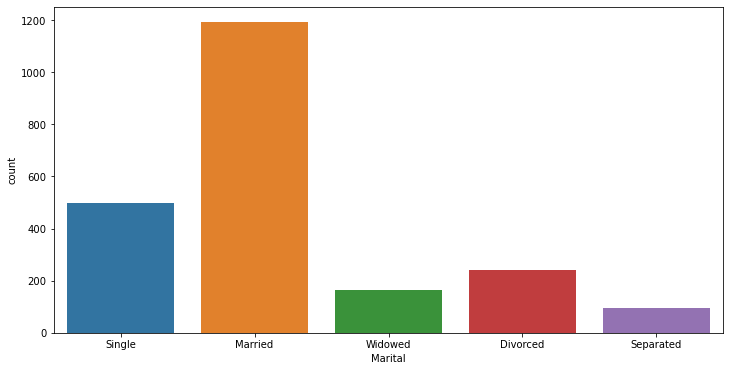

In [28]:
plt.figure(figsize=(12,6))
sns.countplot(P["Marital"])

<AxesSubplot:xlabel='Race', ylabel='count'>

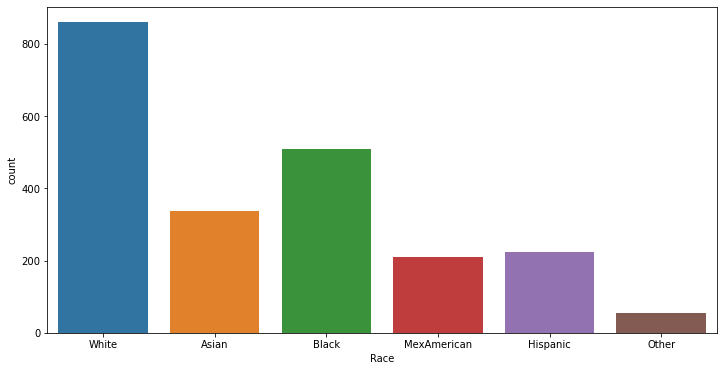

In [29]:
plt.figure(figsize=(12,6))
sns.countplot(P["Race"])

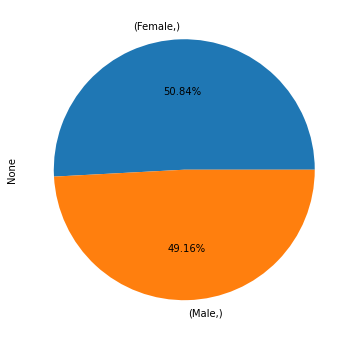

In [30]:
plt.figure(figsize=(12,6))
y1.value_counts().plot(kind='pie', autopct="%.2f%%")
plt.show()

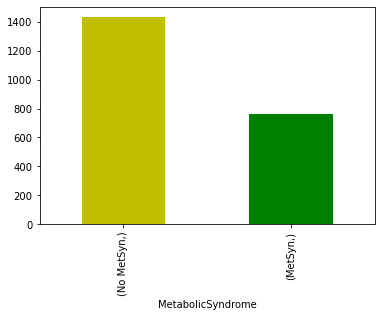

In [31]:
y2.value_counts().plot(kind='bar', color=['y', 'g'])
plt.show()

In [32]:
P.Age.nunique()

61

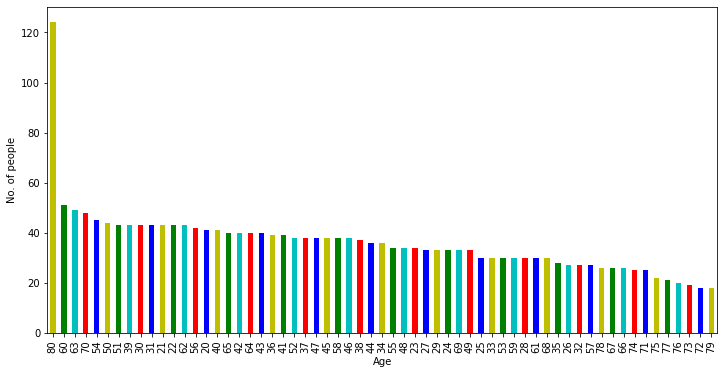

In [33]:
plt.figure(figsize=(12,6))
P.Age.value_counts().plot(kind='bar', xlabel='Age', ylabel='No. of people', color=['y', 'g', 'c', 'r', 'b'])
plt.show()

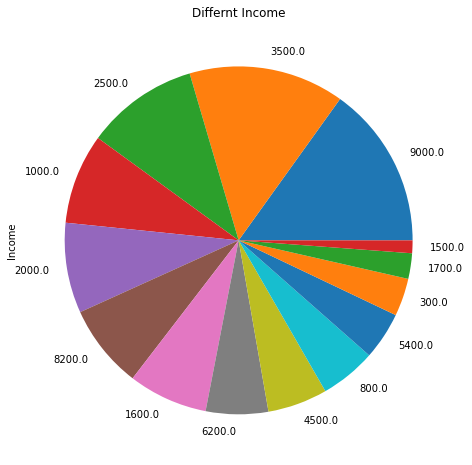

In [34]:
plt.figure(figsize=(12,8))
P.Income.value_counts().plot(kind='pie', title='Differnt Income')
plt.show()

<AxesSubplot:xlabel='BMI', ylabel='Triglycerides'>

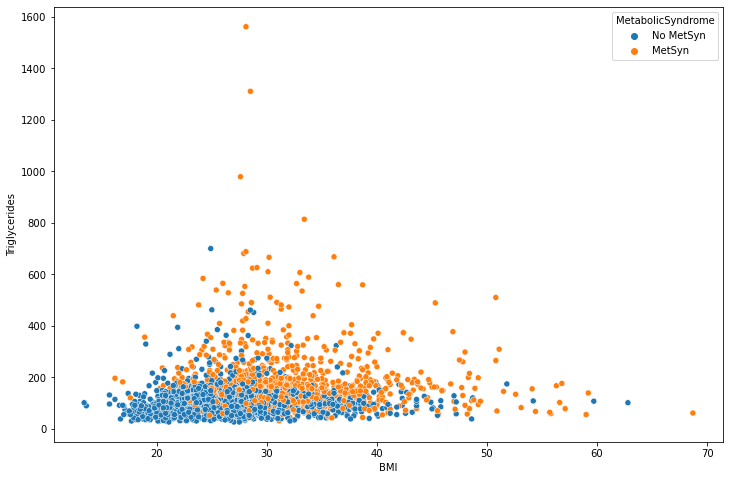

In [35]:
plt.figure(figsize=(12,8))
sns.scatterplot(df1['BMI'], df1['Triglycerides'], hue=df1['MetabolicSyndrome'])

<AxesSubplot:xlabel='UricAcid', ylabel='UrAlbCr'>

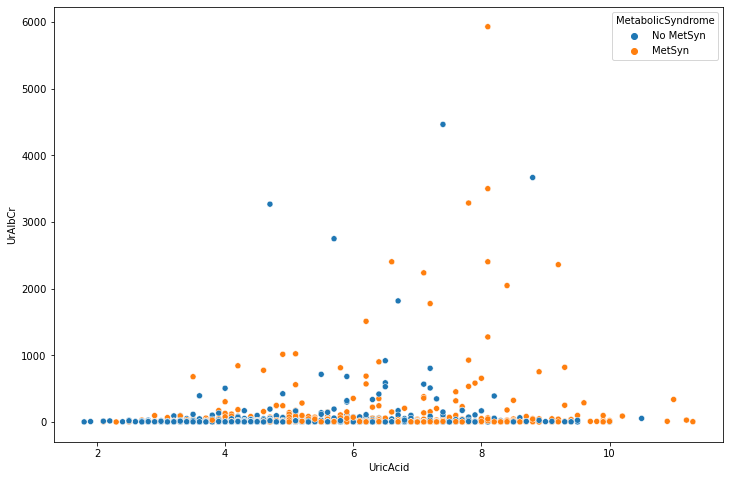

In [36]:
plt.figure(figsize=(12,8))
sns.scatterplot(df1['UricAcid'], df1['UrAlbCr'], hue=df1['MetabolicSyndrome'])

<AxesSubplot:xlabel='BloodGlucose', ylabel='HDL'>

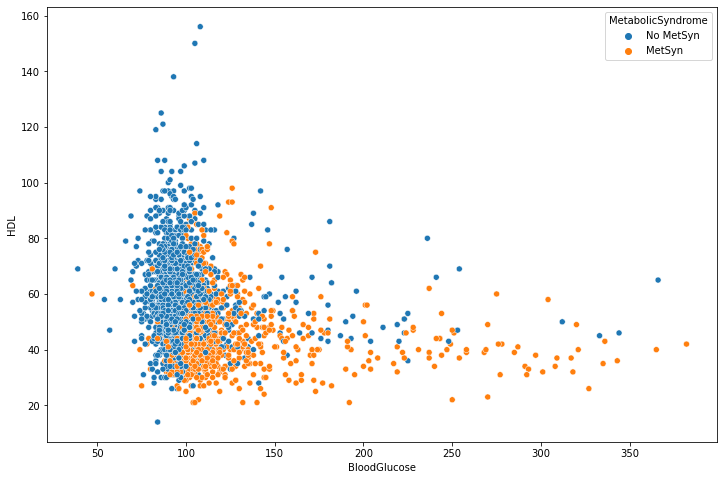

In [37]:
plt.figure(figsize=(12,8))
sns.scatterplot(df1['BloodGlucose'], df1['HDL'], hue=df1['MetabolicSyndrome'])

<AxesSubplot:xlabel='Triglycerides', ylabel='BMI'>

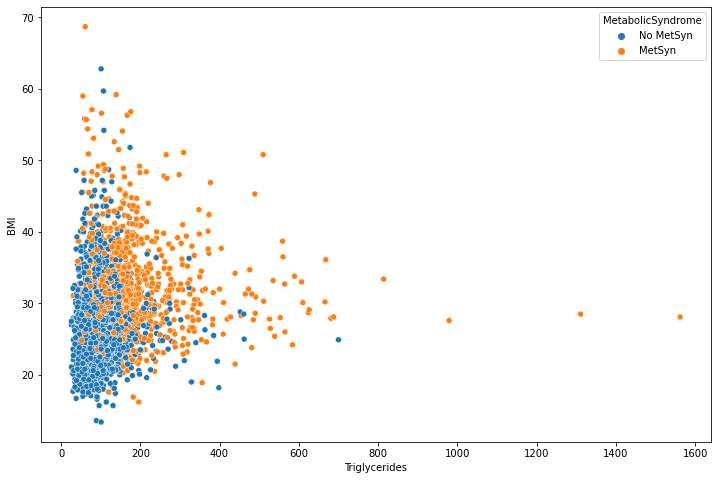

In [38]:
plt.figure(figsize=(12,8))
sns.scatterplot(df1['Triglycerides'], df1['BMI'], hue=df1['MetabolicSyndrome'])

<AxesSubplot:xlabel='WaistCirc', ylabel='BMI'>

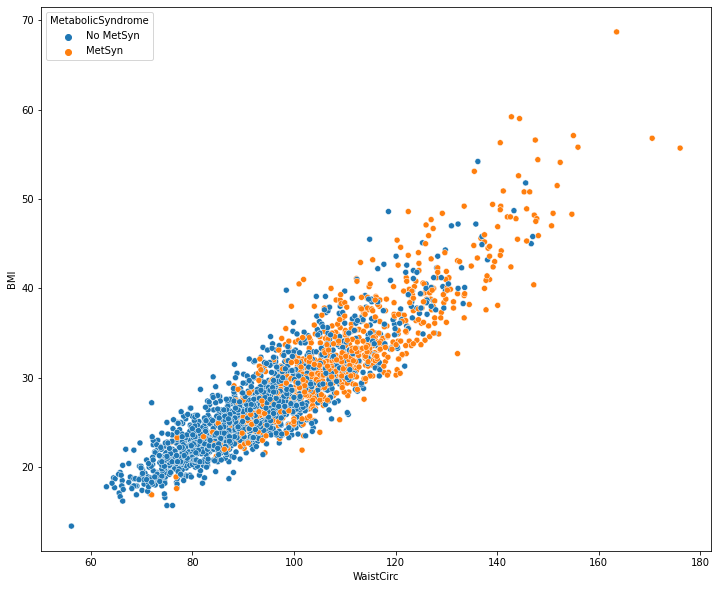

In [39]:
plt.figure(figsize=(12,10))
sns.scatterplot(df1['WaistCirc'], df1['BMI'], hue=df1['MetabolicSyndrome'])

<AxesSubplot:xlabel='Income', ylabel='BMI'>

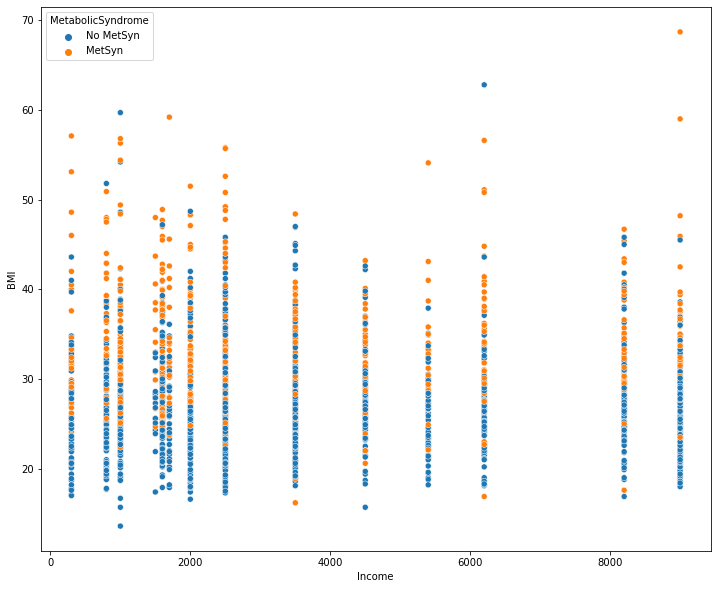

In [40]:
plt.figure(figsize=(12,10))
sns.scatterplot(df1['Income'], df1['BMI'], hue=df1['MetabolicSyndrome'])

<BarContainer object of 5 artists>

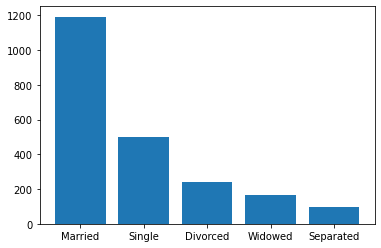

In [41]:
plt.bar(P["Marital"].value_counts().keys(), P["Marital"].value_counts().values)

In [42]:
X.isna().sum()

Age              0
Marital          0
Income           0
Race             0
WaistCirc        0
BMI              0
Albuminuria      0
UrAlbCr          0
UricAcid         0
BloodGlucose     0
HDL              0
Triglycerides    0
dtype: int64

In [43]:
df.head()

,Age,Marital,Income,Race,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides
0,22,Single,8200.0,White,81.0,23.3,0,3.88,4.9,92,41,84
1,44,Married,4500.0,White,80.1,23.2,0,8.55,4.5,82,28,56
2,21,Single,800.0,Asian,69.6,20.1,0,5.07,5.4,107,43,78
3,43,Single,2000.0,Black,120.4,33.3,0,5.22,5.0,104,73,141
4,51,Married,3500.0,Asian,81.1,20.1,0,8.13,5.0,95,43,126


In [44]:
X.head()

,Age,Marital,Income,Race,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides
0,22,Single,8200.0,White,81.0,23.3,0,3.88,4.9,92,41,84
1,44,Married,4500.0,White,80.1,23.2,0,8.55,4.5,82,28,56
2,21,Single,800.0,Asian,69.6,20.1,0,5.07,5.4,107,43,78
3,43,Single,2000.0,Black,120.4,33.3,0,5.22,5.0,104,73,141
4,51,Married,3500.0,Asian,81.1,20.1,0,8.13,5.0,95,43,126


In [45]:
X

,Age,Marital,Income,Race,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides
0,22,Single,8200.0,White,81.0,23.3,0,3.88,4.9,92,41,84
1,44,Married,4500.0,White,80.1,23.2,0,8.55,4.5,82,28,56
2,21,Single,800.0,Asian,69.6,20.1,0,5.07,5.4,107,43,78
3,43,Single,2000.0,Black,120.4,33.3,0,5.22,5.0,104,73,141
4,51,Married,3500.0,Asian,81.1,20.1,0,8.13,5.0,95,43,126
...,...,...,...,...,...,...,...,...,...,...,...,...
2396,48,Married,1000.0,Other,97.0,59.7,0,22.11,5.8,152,57,107
2397,30,Single,2000.0,Asian,97.0,18.0,0,2.90,7.9,91,90,91
2398,28,Single,800.0,MexAmerican,100.8,29.4,0,2.78,6.2,99,47,84
2399,27,Married,8200.0,MexAmerican,106.6,31.3,0,4.15,6.2,100,41,124


In [46]:
X.Albuminuria.value_counts()

0    1897
1     239
2      57
Name: Albuminuria, dtype: int64

In [47]:
Z=X.copy()

In [48]:
X=Z

In [49]:
X

,Age,Marital,Income,Race,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides
0,22,Single,8200.0,White,81.0,23.3,0,3.88,4.9,92,41,84
1,44,Married,4500.0,White,80.1,23.2,0,8.55,4.5,82,28,56
2,21,Single,800.0,Asian,69.6,20.1,0,5.07,5.4,107,43,78
3,43,Single,2000.0,Black,120.4,33.3,0,5.22,5.0,104,73,141
4,51,Married,3500.0,Asian,81.1,20.1,0,8.13,5.0,95,43,126
...,...,...,...,...,...,...,...,...,...,...,...,...
2396,48,Married,1000.0,Other,97.0,59.7,0,22.11,5.8,152,57,107
2397,30,Single,2000.0,Asian,97.0,18.0,0,2.90,7.9,91,90,91
2398,28,Single,800.0,MexAmerican,100.8,29.4,0,2.78,6.2,99,47,84
2399,27,Married,8200.0,MexAmerican,106.6,31.3,0,4.15,6.2,100,41,124


In [50]:
from sklearn.preprocessing import OneHotEncoder

In [51]:
encoder=OneHotEncoder()

In [52]:
# X[['Asian', 'Black', 'Hispanic', 'MexAmerican', 'Other', 'White']]=encoder.transform()

In [53]:
c1=encoder.fit_transform(X[['Race']])

In [54]:
encoder.categories_

[array(['Asian', 'Black', 'Hispanic', 'MexAmerican', 'Other', 'White'],
       dtype=object)]

In [55]:
c1

<2193x6 sparse matrix of type '<class 'numpy.float64'>'
	with 2193 stored elements in Compressed Sparse Row format>

In [56]:
c1=c1.toarray()
c1

array([[0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1.]])

In [57]:
c1=pd.DataFrame(c1,columns=['Asian', 'Black', 'Hispanic', 'MexAmerican', 'Other', 'White'], index=X.index)

In [58]:
c1

,Asian,Black,Hispanic,MexAmerican,Other,White
0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
2396,0.0,0.0,0.0,0.0,1.0,0.0
2397,1.0,0.0,0.0,0.0,0.0,0.0
2398,0.0,0.0,0.0,1.0,0.0,0.0
2399,0.0,0.0,0.0,1.0,0.0,0.0


In [59]:
X.Race.unique()

array(['White', 'Asian', 'Black', 'MexAmerican', 'Hispanic', 'Other'],
      dtype=object)

In [60]:
c1.shape

(2193, 6)

In [61]:
X

,Age,Marital,Income,Race,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides
0,22,Single,8200.0,White,81.0,23.3,0,3.88,4.9,92,41,84
1,44,Married,4500.0,White,80.1,23.2,0,8.55,4.5,82,28,56
2,21,Single,800.0,Asian,69.6,20.1,0,5.07,5.4,107,43,78
3,43,Single,2000.0,Black,120.4,33.3,0,5.22,5.0,104,73,141
4,51,Married,3500.0,Asian,81.1,20.1,0,8.13,5.0,95,43,126
...,...,...,...,...,...,...,...,...,...,...,...,...
2396,48,Married,1000.0,Other,97.0,59.7,0,22.11,5.8,152,57,107
2397,30,Single,2000.0,Asian,97.0,18.0,0,2.90,7.9,91,90,91
2398,28,Single,800.0,MexAmerican,100.8,29.4,0,2.78,6.2,99,47,84
2399,27,Married,8200.0,MexAmerican,106.6,31.3,0,4.15,6.2,100,41,124


In [62]:
X=pd.concat([X,c1], axis=1)

In [63]:
X

,Age,Marital,Income,Race,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides,Asian,Black,Hispanic,MexAmerican,Other,White
0,22,Single,8200.0,White,81.0,23.3,0,3.88,4.9,92,41,84,0.0,0.0,0.0,0.0,0.0,1.0
1,44,Married,4500.0,White,80.1,23.2,0,8.55,4.5,82,28,56,0.0,0.0,0.0,0.0,0.0,1.0
2,21,Single,800.0,Asian,69.6,20.1,0,5.07,5.4,107,43,78,1.0,0.0,0.0,0.0,0.0,0.0
3,43,Single,2000.0,Black,120.4,33.3,0,5.22,5.0,104,73,141,0.0,1.0,0.0,0.0,0.0,0.0
4,51,Married,3500.0,Asian,81.1,20.1,0,8.13,5.0,95,43,126,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2396,48,Married,1000.0,Other,97.0,59.7,0,22.11,5.8,152,57,107,0.0,0.0,0.0,0.0,1.0,0.0
2397,30,Single,2000.0,Asian,97.0,18.0,0,2.90,7.9,91,90,91,1.0,0.0,0.0,0.0,0.0,0.0
2398,28,Single,800.0,MexAmerican,100.8,29.4,0,2.78,6.2,99,47,84,0.0,0.0,0.0,1.0,0.0,0.0
2399,27,Married,8200.0,MexAmerican,106.6,31.3,0,4.15,6.2,100,41,124,0.0,0.0,0.0,1.0,0.0,0.0


In [64]:
df[['Race']].isna().sum()

Race    0
dtype: int64

In [65]:
print(f"null values in Marital={df.Marital.isna().sum()}    null %age={df.Marital.isna().sum()/df.shape[0] *100}")

null values in Marital=0    null %age=0.0


In [66]:
encoder=OneHotEncoder()
c2=encoder.fit_transform(X[['Marital']])

In [67]:
encoder.categories_

[array(['Divorced', 'Married', 'Separated', 'Single', 'Widowed'],
       dtype=object)]

In [68]:
c2

<2193x5 sparse matrix of type '<class 'numpy.float64'>'
	with 2193 stored elements in Compressed Sparse Row format>

In [69]:
c2=c2.toarray()

In [70]:
marital=pd.DataFrame(c2, columns=['Divorced', 'Married', 'Separated', 'Single', 'Widowed'], index=X.index)
marital

,Divorced,Married,Separated,Single,Widowed
0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...
2396,0.0,1.0,0.0,0.0,0.0
2397,0.0,0.0,0.0,1.0,0.0
2398,0.0,0.0,0.0,1.0,0.0
2399,0.0,1.0,0.0,0.0,0.0


In [71]:
marital.isna().sum()

Divorced     0
Married      0
Separated    0
Single       0
Widowed      0
dtype: int64

In [72]:
# race.isna().sum()

In [73]:
# X=X.join([race,marital])

In [74]:
X

,Age,Marital,Income,Race,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides,Asian,Black,Hispanic,MexAmerican,Other,White
0,22,Single,8200.0,White,81.0,23.3,0,3.88,4.9,92,41,84,0.0,0.0,0.0,0.0,0.0,1.0
1,44,Married,4500.0,White,80.1,23.2,0,8.55,4.5,82,28,56,0.0,0.0,0.0,0.0,0.0,1.0
2,21,Single,800.0,Asian,69.6,20.1,0,5.07,5.4,107,43,78,1.0,0.0,0.0,0.0,0.0,0.0
3,43,Single,2000.0,Black,120.4,33.3,0,5.22,5.0,104,73,141,0.0,1.0,0.0,0.0,0.0,0.0
4,51,Married,3500.0,Asian,81.1,20.1,0,8.13,5.0,95,43,126,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2396,48,Married,1000.0,Other,97.0,59.7,0,22.11,5.8,152,57,107,0.0,0.0,0.0,0.0,1.0,0.0
2397,30,Single,2000.0,Asian,97.0,18.0,0,2.90,7.9,91,90,91,1.0,0.0,0.0,0.0,0.0,0.0
2398,28,Single,800.0,MexAmerican,100.8,29.4,0,2.78,6.2,99,47,84,0.0,0.0,0.0,1.0,0.0,0.0
2399,27,Married,8200.0,MexAmerican,106.6,31.3,0,4.15,6.2,100,41,124,0.0,0.0,0.0,1.0,0.0,0.0


In [75]:
X.drop(labels=["Marital", "Race"], axis=1, inplace=True)

In [76]:
X

,Age,Income,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides,Asian,Black,Hispanic,MexAmerican,Other,White
0,22,8200.0,81.0,23.3,0,3.88,4.9,92,41,84,0.0,0.0,0.0,0.0,0.0,1.0
1,44,4500.0,80.1,23.2,0,8.55,4.5,82,28,56,0.0,0.0,0.0,0.0,0.0,1.0
2,21,800.0,69.6,20.1,0,5.07,5.4,107,43,78,1.0,0.0,0.0,0.0,0.0,0.0
3,43,2000.0,120.4,33.3,0,5.22,5.0,104,73,141,0.0,1.0,0.0,0.0,0.0,0.0
4,51,3500.0,81.1,20.1,0,8.13,5.0,95,43,126,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2396,48,1000.0,97.0,59.7,0,22.11,5.8,152,57,107,0.0,0.0,0.0,0.0,1.0,0.0
2397,30,2000.0,97.0,18.0,0,2.90,7.9,91,90,91,1.0,0.0,0.0,0.0,0.0,0.0
2398,28,800.0,100.8,29.4,0,2.78,6.2,99,47,84,0.0,0.0,0.0,1.0,0.0,0.0
2399,27,8200.0,106.6,31.3,0,4.15,6.2,100,41,124,0.0,0.0,0.0,1.0,0.0,0.0


In [77]:
X=pd.concat([X, marital], axis=1)

In [78]:
X

,Age,Income,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides,...,Black,Hispanic,MexAmerican,Other,White,Divorced,Married,Separated,Single,Widowed
0,22,8200.0,81.0,23.3,0,3.88,4.9,92,41,84,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,44,4500.0,80.1,23.2,0,8.55,4.5,82,28,56,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,21,800.0,69.6,20.1,0,5.07,5.4,107,43,78,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,43,2000.0,120.4,33.3,0,5.22,5.0,104,73,141,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,51,3500.0,81.1,20.1,0,8.13,5.0,95,43,126,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2396,48,1000.0,97.0,59.7,0,22.11,5.8,152,57,107,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2397,30,2000.0,97.0,18.0,0,2.90,7.9,91,90,91,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2398,28,800.0,100.8,29.4,0,2.78,6.2,99,47,84,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2399,27,8200.0,106.6,31.3,0,4.15,6.2,100,41,124,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [79]:
y1

,Sex
0,Male
1,Female
2,Male
3,Female
4,Male
...,...
2396,Female
2397,Female
2398,Male
2399,Male


In [80]:
# (y1=='')

In [81]:
y2

,MetabolicSyndrome
0,No MetSyn
1,No MetSyn
2,No MetSyn
3,No MetSyn
4,No MetSyn
...,...
2396,No MetSyn
2397,No MetSyn
2398,No MetSyn
2399,MetSyn


In [82]:
y2_new=(y2=='MetSyn').astype(int)
y2_new

,MetabolicSyndrome
0,0
1,0
2,0
3,0
4,0
...,...
2396,0
2397,0
2398,0
2399,1


In [83]:
X

,Age,Income,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides,...,Black,Hispanic,MexAmerican,Other,White,Divorced,Married,Separated,Single,Widowed
0,22,8200.0,81.0,23.3,0,3.88,4.9,92,41,84,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,44,4500.0,80.1,23.2,0,8.55,4.5,82,28,56,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,21,800.0,69.6,20.1,0,5.07,5.4,107,43,78,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,43,2000.0,120.4,33.3,0,5.22,5.0,104,73,141,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,51,3500.0,81.1,20.1,0,8.13,5.0,95,43,126,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2396,48,1000.0,97.0,59.7,0,22.11,5.8,152,57,107,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2397,30,2000.0,97.0,18.0,0,2.90,7.9,91,90,91,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2398,28,800.0,100.8,29.4,0,2.78,6.2,99,47,84,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2399,27,8200.0,106.6,31.3,0,4.15,6.2,100,41,124,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [84]:
from sklearn.preprocessing import StandardScaler

In [85]:
scaler=StandardScaler()

In [86]:
X_new=scaler.fit_transform(X)
X_new

array([[-1.57998294,  1.40690348, -1.08582111, ..., -0.21279384,
         1.84488874, -0.28617202],
       [-0.32940288,  0.13937347, -1.14222625, ..., -0.21279384,
        -0.54203811, -0.28617202],
       [-1.63682749, -1.12815654, -1.80028623, ..., -0.21279384,
         1.84488874, -0.28617202],
       ...,
       [-1.23891565, -1.12815654,  0.15509199, ..., -0.21279384,
         1.84488874, -0.28617202],
       [-1.2957602 ,  1.40690348,  0.51859179, ..., -0.21279384,
        -0.54203811, -0.28617202],
       [ 0.58010989,  0.72175212,  0.51859179, ..., -0.21279384,
         1.84488874, -0.28617202]])

In [87]:
# Below are 5 models out of which 1 with beast accuracy will be selected

In [88]:
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import roc_auc_score, roc_curve
import time
from sklearn.metrics import confusion_matrix, classification_report

In [89]:
# Logistic regression on MetSyn or No MetSyn

X_train, X_test, y_train, y_test = train_test_split(X_new, y2_new, test_size=0.2, random_state=123)
model=LogisticRegression()
model.fit(X_train, y_train)

y2_tr=model.predict(X_train)
y2_test=model.predict(X_test)

cm=confusion_matrix(y_train, y2_tr)
cm1=confusion_matrix(y_test, y2_test)

print(cm)
print(cm1)

print(classification_report(y_train, y2_tr))
print(classification_report(y_test, y2_test))

[[1029  115]
 [ 201  409]]
[[252  37]
 [ 34 116]]
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1144
           1       0.78      0.67      0.72       610

    accuracy                           0.82      1754
   macro avg       0.81      0.78      0.79      1754
weighted avg       0.82      0.82      0.82      1754

              precision    recall  f1-score   support

           0       0.88      0.87      0.88       289
           1       0.76      0.77      0.77       150

    accuracy                           0.84       439
   macro avg       0.82      0.82      0.82       439
weighted avg       0.84      0.84      0.84       439



In [90]:
# Logistic regression on Male or Female

X_train, X_test, y_train, y_test = train_test_split(X_new, y1, test_size=0.2, random_state=123)
model=LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y2_tr=model.predict(X_train)
y2_test=model.predict(X_test)

cm=confusion_matrix(y_train, y2_tr)
cm1=confusion_matrix(y_test, y2_test)

print(cm)
print(cm1)

print(classification_report(y_train, y2_tr))
print(classification_report(y_test, y2_test))

[[724 174]
 [168 688]]
[[167  50]
 [ 55 167]]
              precision    recall  f1-score   support

      Female       0.81      0.81      0.81       898
        Male       0.80      0.80      0.80       856

    accuracy                           0.81      1754
   macro avg       0.80      0.80      0.80      1754
weighted avg       0.81      0.81      0.81      1754

              precision    recall  f1-score   support

      Female       0.75      0.77      0.76       217
        Male       0.77      0.75      0.76       222

    accuracy                           0.76       439
   macro avg       0.76      0.76      0.76       439
weighted avg       0.76      0.76      0.76       439



In [91]:
# XGBoost on MetSyn or No MetSyn
import xgboost
X_train, X_test, y_train, y_test = train_test_split(X_new, y2_new, test_size=0.2, random_state=123)
model=xgboost.XGBClassifier()
model.fit(X_train, y_train)

y2_tr=model.predict(X_train)
y2_test=model.predict(X_test)

cm=confusion_matrix(y_train, y2_tr)
cm1=confusion_matrix(y_test, y2_test)

print(cm)
print(cm1)

print(classification_report(y_train, y2_tr))
print(classification_report(y_test, y2_test))

[13:45:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[1144    0]
 [   0  610]]
[[259  30]
 [ 32 118]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1144
           1       1.00      1.00      1.00       610

    accuracy                           1.00      1754
   macro avg       1.00      1.00      1.00      1754
weighted avg       1.00      1.00      1.00      1754

              precision    recall  f1-score   support

           0       0.89      0.90      0.89       289
           1       0.80      0.79      0.79       150

    accuracy                           0.86       439
   macro avg       0.84      0.84      0.84       439
weighted avg       0.86      0.86      0.

In [92]:
# XGBoost on Male or Female
import xgboost
X_train, X_test, y_train, y_test = train_test_split(X_new, y1, test_size=0.2, random_state=123)
model=xgboost.XGBClassifier()
model.fit(X_train, y_train)

y2_tr=model.predict(X_train)
y2_test=model.predict(X_test)

cm=confusion_matrix(y_train, y2_tr)
cm1=confusion_matrix(y_test, y2_test)

print(cm)
print(cm1)

print(classification_report(y_train, y2_tr))
print(classification_report(y_test, y2_test))

[13:45:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[898   0]
 [  0 856]]
[[167  50]
 [ 42 180]]
              precision    recall  f1-score   support

      Female       1.00      1.00      1.00       898
        Male       1.00      1.00      1.00       856

    accuracy                           1.00      1754
   macro avg       1.00      1.00      1.00      1754
weighted avg       1.00      1.00      1.00      1754

              precision    recall  f1-score   support

      Female       0.80      0.77      0.78       217
        Male       0.78      0.81      0.80       222

    accuracy                           0.79       439
   macro avg       0.79      0.79      0.79       439
weighted avg       0.79      0.79      0.79  

In [93]:
# RandomForest on MetSyn or No MetSyn

X_train, X_test, y_train, y_test = train_test_split(X_new, y2_new, test_size=0.2, random_state=123)
model=RandomForestClassifier()
model.fit(X_train, y_train)

y2_tr=model.predict(X_train)
y2_test=model.predict(X_test)

cm=confusion_matrix(y_train, y2_tr)
cm1=confusion_matrix(y_test, y2_test)

print(cm)
print(cm1)

print(classification_report(y_train, y2_tr))
print(classification_report(y_test, y2_test))

[[1144    0]
 [   0  610]]
[[265  24]
 [ 32 118]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1144
           1       1.00      1.00      1.00       610

    accuracy                           1.00      1754
   macro avg       1.00      1.00      1.00      1754
weighted avg       1.00      1.00      1.00      1754

              precision    recall  f1-score   support

           0       0.89      0.92      0.90       289
           1       0.83      0.79      0.81       150

    accuracy                           0.87       439
   macro avg       0.86      0.85      0.86       439
weighted avg       0.87      0.87      0.87       439



In [94]:
# RandomForest on Male or Female

X_train, X_test, y_train, y_test = train_test_split(X_new, y1, test_size=0.2, random_state=123)
model=RandomForestClassifier()
model.fit(X_train, y_train)

y2_tr=model.predict(X_train)
y2_test=model.predict(X_test)

cm=confusion_matrix(y_train, y2_tr)
cm1=confusion_matrix(y_test, y2_test)

print(cm)
print(cm1)

print(classification_report(y_train, y2_tr))
print(classification_report(y_test, y2_test))

[[898   0]
 [  0 856]]
[[153  64]
 [ 53 169]]
              precision    recall  f1-score   support

      Female       1.00      1.00      1.00       898
        Male       1.00      1.00      1.00       856

    accuracy                           1.00      1754
   macro avg       1.00      1.00      1.00      1754
weighted avg       1.00      1.00      1.00      1754

              precision    recall  f1-score   support

      Female       0.74      0.71      0.72       217
        Male       0.73      0.76      0.74       222

    accuracy                           0.73       439
   macro avg       0.73      0.73      0.73       439
weighted avg       0.73      0.73      0.73       439



In [95]:
# Support Vector on MetSyn or No MetSyn

X_train, X_test, y_train, y_test = train_test_split(X_new, y2_new, test_size=0.2, random_state=123)
model=SVC()
model.fit(X_train, y_train)

y2_tr=model.predict(X_train)
y2_test=model.predict(X_test)

cm=confusion_matrix(y_train, y2_tr)
cm1=confusion_matrix(y_test, y2_test)

print(cm)
print(cm1)

print(classification_report(y_train, y2_tr))
print(classification_report(y_test, y2_test))

[[1078   66]
 [ 169  441]]
[[255  34]
 [ 37 113]]
              precision    recall  f1-score   support

           0       0.86      0.94      0.90      1144
           1       0.87      0.72      0.79       610

    accuracy                           0.87      1754
   macro avg       0.87      0.83      0.85      1754
weighted avg       0.87      0.87      0.86      1754

              precision    recall  f1-score   support

           0       0.87      0.88      0.88       289
           1       0.77      0.75      0.76       150

    accuracy                           0.84       439
   macro avg       0.82      0.82      0.82       439
weighted avg       0.84      0.84      0.84       439



In [96]:
# Support Vector on Male or Female

X_train, X_test, y_train, y_test = train_test_split(X_new, y1, test_size=0.2, random_state=123)
model=SVC()
model.fit(X_train, y_train)

y2_tr=model.predict(X_train)
y2_test=model.predict(X_test)

cm=confusion_matrix(y_train, y2_tr)
cm1=confusion_matrix(y_test, y2_test)

print(cm)
print(cm1)

print(classification_report(y_train, y2_tr))
print(classification_report(y_test, y2_test))

[[752 146]
 [116 740]]
[[163  54]
 [ 57 165]]
              precision    recall  f1-score   support

      Female       0.87      0.84      0.85       898
        Male       0.84      0.86      0.85       856

    accuracy                           0.85      1754
   macro avg       0.85      0.85      0.85      1754
weighted avg       0.85      0.85      0.85      1754

              precision    recall  f1-score   support

      Female       0.74      0.75      0.75       217
        Male       0.75      0.74      0.75       222

    accuracy                           0.75       439
   macro avg       0.75      0.75      0.75       439
weighted avg       0.75      0.75      0.75       439



In [97]:
# KNeighbors on MetSyn or No MetSyn

X_train, X_test, y_train, y_test = train_test_split(X_new, y2_new, test_size=0.2, random_state=123)
model=KNeighborsClassifier()
model.fit(X_train, y_train)

y2_tr=model.predict(X_train)
y2_test=model.predict(X_test)

cm=confusion_matrix(y_train, y2_tr)
cm1=confusion_matrix(y_test, y2_test)

print(cm)
print(cm1)

print(classification_report(y_train, y2_tr))
print(classification_report(y_test, y2_test))

[[1036  108]
 [ 171  439]]
[[251  38]
 [ 51  99]]
              precision    recall  f1-score   support

           0       0.86      0.91      0.88      1144
           1       0.80      0.72      0.76       610

    accuracy                           0.84      1754
   macro avg       0.83      0.81      0.82      1754
weighted avg       0.84      0.84      0.84      1754

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       289
           1       0.72      0.66      0.69       150

    accuracy                           0.80       439
   macro avg       0.78      0.76      0.77       439
weighted avg       0.79      0.80      0.79       439



In [98]:
# KNeighbors on Male or Female

X_train, X_test, y_train, y_test = train_test_split(X_new, y1, test_size=0.2, random_state=123)
model=KNeighborsClassifier()
model.fit(X_train, y_train)

y2_tr=model.predict(X_train)
y2_test=model.predict(X_test)

cm=confusion_matrix(y_train, y2_tr)
cm1=confusion_matrix(y_test, y2_test)

print(cm)
print(cm1)

print(classification_report(y_train, y2_tr))
print(classification_report(y_test, y2_test))

[[717 181]
 [152 704]]
[[140  77]
 [ 71 151]]
              precision    recall  f1-score   support

      Female       0.83      0.80      0.81       898
        Male       0.80      0.82      0.81       856

    accuracy                           0.81      1754
   macro avg       0.81      0.81      0.81      1754
weighted avg       0.81      0.81      0.81      1754

              precision    recall  f1-score   support

      Female       0.66      0.65      0.65       217
        Male       0.66      0.68      0.67       222

    accuracy                           0.66       439
   macro avg       0.66      0.66      0.66       439
weighted avg       0.66      0.66      0.66       439



In [99]:
# Out of all these XGBoost provides best accuracy on test with 86% on y2 and 79% on y1 target

In [100]:
# XGBoost on MetSyn or No MetSyn
import xgboost
X_train, X_test, y_train, y_test = train_test_split(X_new, y2_new, test_size=0.2, random_state=123)
model=xgboost.XGBClassifier()
model.fit(X_train, y_train)

y2_tr=model.predict(X_train)
y2_test=model.predict(X_test)

cm=confusion_matrix(y_train, y2_tr)
cm1=confusion_matrix(y_test, y2_test)

print(cm)
print("\n")
print(cm1)

print(classification_report(y_train, y2_tr))
print(classification_report(y_test, y2_test))

[13:45:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[1144    0]
 [   0  610]]


[[259  30]
 [ 32 118]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1144
           1       1.00      1.00      1.00       610

    accuracy                           1.00      1754
   macro avg       1.00      1.00      1.00      1754
weighted avg       1.00      1.00      1.00      1754

              precision    recall  f1-score   support

           0       0.89      0.90      0.89       289
           1       0.80      0.79      0.79       150

    accuracy                           0.86       439
   macro avg       0.84      0.84      0.84       439
weighted avg       0.86      0.86      

In [101]:
# XGBoost on Male or Female
import xgboost
X_train, X_test, y_train, y_test = train_test_split(X_new, y1, test_size=0.2, random_state=123)
model=xgboost.XGBClassifier()
model.fit(X_train, y_train)

y2_tr=model.predict(X_train)
y2_test=model.predict(X_test)

cm=confusion_matrix(y_train, y2_tr)
cm1=confusion_matrix(y_test, y2_test)

print(cm)
print("\n")
print(cm1)

print(classification_report(y_train, y2_tr))
print(classification_report(y_test, y2_test))

[13:45:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[898   0]
 [  0 856]]


[[167  50]
 [ 42 180]]
              precision    recall  f1-score   support

      Female       1.00      1.00      1.00       898
        Male       1.00      1.00      1.00       856

    accuracy                           1.00      1754
   macro avg       1.00      1.00      1.00      1754
weighted avg       1.00      1.00      1.00      1754

              precision    recall  f1-score   support

      Female       0.80      0.77      0.78       217
        Male       0.78      0.81      0.80       222

    accuracy                           0.79       439
   macro avg       0.79      0.79      0.79       439
weighted avg       0.79      0.79      0.79